## Modules

In [1]:
%matplotlib widget
import glob
import sncosmo
import numpy as np
import pandas as pd
import astropy as ap
import ipywidgets as ipw
import matplotlib.pyplot as plt
import ztfquery

from ztfquery import marshal
from ztflc import forcephotometry
from sncosmo.models import Source, Model, get_source
from sncosmo import get_bandpass, get_magsystem
from sncosmo.photdata import photometric_data

## Read df, create normalization value, keep those with SNR > 5

In [28]:
path = glob.glob("../Data/ztf/forcephotometry/*ZTF*")
pc = ipw.Dropdown(options=path,
                  description='SN choice:')
display(pc)

Dropdown(description='SN choice:', options=('../Data/ztf/forcephotometry/ZTF20aanakcd_SNT_5.0.csv', '../Data/z…

In [133]:
name = pc.value.split('/')[-1].split('_')[0]
with_out = pc.value.split('/')[-1].split('_')[1]

In [138]:
df[df['ampl.err'] == 0]

,sigma.err,ampl,ampl.err,fval,chi2,chi2dof,filename,humidity,filter,obsmjd,...,maglim,status,filterid,fieldid,moonalt,moonillf,target_x,target_y,data_hasnan,zpcoef
sigma,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,0.0,-0.0,0.0,0.0,ztf_20180611238079_000715_zg_c03_o.fits,23.0,ZTF_g,58280.238125,...,21.82,1,1,715,-45.67820,-0.093153,558.514709,-16.070919,True,0.295121
NaN,NaN,NaN,0.0,-0.0,0.0,0.0,ztf_20180522200868_000715_zr_c03_o.fits,59.0,ZTF_r,58260.200891,...,20.28,1,2,715,46.78990,0.506057,547.237859,89.163715,True,0.309030
NaN,NaN,NaN,0.0,-0.0,0.0,0.0,ztf_20180603196806_000715_zg_c03_o.fits,41.0,ZTF_g,58272.196829,...,21.75,1,1,715,-19.19330,-0.818466,553.764930,148.052262,True,0.313666
NaN,NaN,NaN,0.0,-0.0,0.0,0.0,ztf_20200216341134_000715_zi_c03_o.fits,16.0,ZTF_i,58895.341134,...,21.38,1,3,715,-9.70203,-0.457487,625.146999,2945.194820,True,0.176088
NaN,NaN,NaN,0.0,-0.0,0.0,0.0,ztf_20191210535104_000715_zi_c03_o.fits,29.0,ZTF_i,58827.535104,...,20.88,1,3,715,1.25982,0.968722,591.258402,2953.782242,True,0.200733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,0.0,-0.0,0.0,0.0,ztf_20180609174688_000715_zi_c03_o.fits,22.0,ZTF_i,58278.174722,...,20.89,1,3,715,-54.67030,-0.264620,553.682064,3060.910653,True,0.591656
NaN,NaN,NaN,0.0,-0.0,0.0,0.0,ztf_20180406357674_000715_zi_c03_o.fits,26.0,ZTF_i,58214.357697,...,19.64,1,3,715,12.18360,-0.682680,544.273400,3032.389011,True,0.924943
NaN,NaN,NaN,0.0,-0.0,0.0,0.0,ztf_20180505342373_000715_zi_c03_o.fits,26.0,ZTF_i,58243.342407,...,20.39,1,3,715,13.03110,-0.750978,555.069973,3003.914521,True,0.588822


In [134]:
df = pd.read_csv(pc.value, index_col=0)

scalezp = 25.
f0coef = 10**(-(df["magzp"]-scalezp)/2.5)
df['zpcoef'] = f0coef

df_snr5 = df[df['ampl']/df[df['ampl.err'] != 0]['ampl.err'] > 5]

## Plot it (normalized)

In [135]:
%matplotlib widget
plt.close()
fig = plt.figure(figsize = [8,5])
ax = fig.add_axes([0.12, 0.12, 0.8, 0.8])

ax.scatter(df['obsmjd'], df['ampl']*df['zpcoef'],
           c=df['filterid'], alpha=0.2, cmap='viridis')
ax.errorbar(df['obsmjd'], df['ampl']*df['zpcoef'],
            yerr=df[df['ampl.err'] != 0]['ampl.err']*df['zpcoef'],
            ls='None', ecolor='0.6')
ax.scatter(df_snr5['obsmjd'], df_snr5['ampl']*df_snr5['zpcoef'],
           c=df_snr5['filterid'], cmap='viridis')
ax.errorbar(df_snr5['obsmjd'], df_snr5['ampl']*df_snr5['zpcoef'],
            yerr=df_snr5['ampl.err']*df_snr5['zpcoef'],
            ls='None', ecolor='0.6')

plt.title(name + ' ' + with_out + ' badsub')

fig.savefig('../Images/' + name + '_' + with_out + '_badsub.pdf', bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [136]:
plt.close()
fig = plt.figure(figsize = [8,5])
ax = fig.add_axes([0.12, 0.12, 0.8, 0.8])

ax.hist(df['ampl']*df['zpcoef'], bins=100)

ax.set_xlabel('Flux')
ax.set_ylabel('N')

plt.title(name + ' ' + with_out + ' badsub')

fig.savefig('../Images/' + name + '_' + with_out + '_badsub-flux_hist.pdf', bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [139]:
plt.close()
fig = plt.figure(figsize = [8,5])
ax = fig.add_axes([0.12, 0.12, 0.8, 0.8])

ax.hist((df['ampl']*df['zpcoef'])/(df[df['ampl.err'] != 0]['ampl.err']*df['zpcoef']),
        bins=100)

ax.set_xlabel('Flux/flux_err')
ax.set_ylabel('N')

plt.title(name + ' ' + with_out + ' badsub')

fig.savefig('../Images/' + name + '_' + with_out + '_badsub-fluxerr_hist.pdf', bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


# SNCOSMO tests 

## Create *table* of *non-normalized* data with correct names (+ normalization column, not used) for sncosmo

In [59]:
dt = pd.DataFrame({'time': df_snr5['obsmjd'],
                   'band': df_snr5['filter'],
                   'flux': df_snr5['ampl'],
                   'fluxerr': df_snr5['ampl.err'],
                   'zp': df_snr5['magzp'],
                   'zpsys': ['ab' for i in range(len(df_snr5))],
                   'zpcoef': df_snr5['zpcoef']}
                 ).sort_values(by='time')

dt_sn = ap.table.QTable.from_pandas(dt)
tb_g = dt_sn[dt_sn['band']=='ZTF_g']

## Fit

### Add to registry

In [60]:
band = sncosmo.get_bandpass('ztfg')
band.name = 'ZTF_g'
sncosmo.registry.register(band)

band = sncosmo.get_bandpass('ztfi')
band.name = 'ZTF_i'
sncosmo.registry.register(band)

band = sncosmo.get_bandpass('ztfr')
band.name = 'ZTF_r'
sncosmo.registry.register(band)

Exception: ztf_g already in registry. Use force=True to override.

### And fit

In [64]:
md_sn = sncosmo.Model(source='salt2')
res, fitted_model = sncosmo.fit_lc(dt_sn, md_sn,
                                   ['z', 't0', 'x0', 'x1', 'c'],
                                   bounds={'z':(0.02, 0.7)})

## Create time grid for plotting

In [65]:
tmin, tmax = [], []
tmin.append(np.min(tb_g['time']) - 10.)
tmax.append(np.max(tb_g['time']) + 10.)
tmin.append(fitted_model.mintime())
tmax.append(fitted_model.maxtime())
tmin = min(tmin)
tmax = max(tmax)
tgrid = np.linspace(tmin, tmax, int(tmax - tmin) + 1)

## Plot normalized-by-hand data, fitted model and residuals

In [66]:
fig = plt.figure(figsize = [8,5])
ax = fig.add_axes([0.1, 0.25, 0.85, 0.7])
ax2 = fig.add_axes([0.1, 0.1, 0.85, 0.1])

toff = fitted_model.parameters[1]
ax.errorbar(tb_g['time']-toff,
            tb_g['flux']*tb_g['zpcoef'],
            tb_g['fluxerr']*tb_g['zpcoef'],
            ls='None',
            marker='.', markersize=3.)
ax.plot(tgrid - toff,
        fitted_model.bandflux('ztfg', tgrid, zp=25., zpsys='ab'),
        color='C0')

residuals = (tb_g['flux']*tb_g['zpcoef'] - fitted_model.bandflux('ztfg', tb_g['time'], zp=25., zpsys='ab'))/(tb_g['fluxerr']*tb_g['zpcoef'])
ax2.scatter(tb_g['time'] - toff, residuals, s=5)
ax2.axhline(0)
ax2.set_xlim(ax.get_xlim())

#### Check that plot_lc normalizes the data the same way that we do (or he other way around?)
#data = photometric_data(dt_sn)
#data = data.normalized(zp=25., zpsys='ab')

#mask = data.band == list(set(data.band))[2]
#time = data.time[mask]
#flux = data.flux[mask]#*dt_sn['zpcoef'][mask]
#fluxerr = data.fluxerr[mask]#*dt_sn['zpcoef'][mask]
#ax.errorbar(time - toff, flux, fluxerr, ls='None',
#            color='r', marker='.', markersize=5.)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-28.302162115640385, 73.76165714394665)

## Code-copying for understanding

In [55]:
models = [fitted_model]
_model_ls = ['-', '--', ':', '-.']

zp = 25.
zpsys='ab'

# Get the model labels
model_labels = [None] * len(models)

# Color options.
cmap = plt.cm.get_cmap('jet_r')
cmap_lims=(3000., 10000.)

# Standardize and normalize data.
data = photometric_data(dt_sn)
data = data.normalized(zp=zp, zpsys=zpsys)
if not np.all(np.ediff1d(data.time) >= 0.0):
    sortidx = np.argsort(data.time)
    data = data[sortidx]
else:
    sortidx = None

# Bands to plot
bands = set(data.band)

# Build figtext (including model parameters, if there is exactly 1 model).

figtext = []

if len(figtext) == 0:
    figtextsize = 0.

# Calculate layout of figure (columns, rows, figure size). We have to
# calculate these explicitly because plt.tight_layout() doesn't space the
# subplots as we'd like them when only some of them have xlabels/xticks.
wspace = 0.6  # All in inches.
hspace = 0.3
lspace = 1.0
bspace = 0.7
trspace = 0.2
ncol = 2
nrow = (len(bands) - 1) // ncol + 1
hpanel = 2.25
wpanel = 3.

figsize = (lspace + wpanel * ncol + wspace * (ncol - 1) + trspace,
           bspace + hpanel * nrow + hspace * (nrow - 1) + trspace +
           figtextsize)

# Create the figure and axes.
fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)

fig.subplots_adjust(left=lspace / figsize[0],
                    bottom=bspace / figsize[1],
                    right=1. - trspace / figsize[0],
                    top=1. - (figtextsize + trspace) / figsize[1],
                    wspace=wspace / wpanel,
                    hspace=hspace / hpanel)

# If there is exactly one model, offset the time axis by the model's t0.
toff = models[0].parameters[1]

# Global min and max of time axis.
tmin, tmax = [], []
tmin.append(np.min(data.time) - 10.)
tmax.append(np.max(data.time) + 10.)
for model in models:
    tmin.append(model.mintime())
    tmax.append(model.maxtime())
tmin = min(tmin)
tmax = max(tmax)
tgrid = np.linspace(tmin, tmax, int(tmax - tmin) + 1)

# Loop over bands
bands = list(bands)
waves = [get_bandpass(b).wave_eff for b in bands]
waves_and_bands = sorted(zip(waves, bands))
for axnum in range(ncol * nrow):
    row = axnum // ncol
    col = axnum % ncol
    ax = axes[row, col]

    if axnum >= len(waves_and_bands):
        ax.set_visible(False)
        ax.set_frame_on(False)
        continue

    wave, band = waves_and_bands[axnum]

    bandname_coords = (0.92, 0.92)
    bandname_ha = 'right'
    bandcolor = cmap((cmap_lims[1] - wave) /
                     (cmap_lims[1] - cmap_lims[0]))
    
    print(band)
    
    # Plot data if there are any.
    mask = data.band == band
    time = data.time[mask]
    flux = data.flux[mask]#*dt_sn['zpcoef'][mask]
    fluxerr = data.fluxerr[mask]#*dt_sn['zpcoef'][mask]
    ax.errorbar(time - toff, flux, fluxerr, ls='None',
                color=bandcolor, marker='.', markersize=3.)

    # Plot model(s) if there are any.
    lines = []
    labels = []
    mflux_ranges = []
    for i, model in enumerate(models):
        if model.bandoverlap(band):
            mflux = model.bandflux(band, tgrid, zp=zp, zpsys=zpsys)
            mflux_ranges.append((mflux.min(), mflux.max()))
            l, = ax.plot(tgrid - toff, mflux,
                         ls=_model_ls[i % len(_model_ls)],
                         marker='None', color=bandcolor)
            lines.append(l)
        else:
            # Add a dummy line so the legend displays all models in the
            # first panel.
            lines.append(plt.Line2D([0, 1], [0, 1],
                                    ls=_model_ls[i % len(_model_ls)],
                                    marker='None', color=bandcolor))
        labels.append(model_labels[i])

    # Band name in corner
    text = band.name if band.name is not None else str(band)
    ax.text(bandname_coords[0], bandname_coords[1], text,
            color='k', ha=bandname_ha, va='top', transform=ax.transAxes)

    ax.axhline(y=0., ls='--', c='k')  # horizontal line at flux = 0.
    ax.set_xlim((tmin-toff, tmax-toff))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Bandpass 'ZTF_g' at 0x7facc00a6e50>
<Bandpass 'ZTF_r' at 0x7facc02c6190>
<Bandpass 'ZTF_i' at 0x7facc2007050>


## Code-using for verification

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

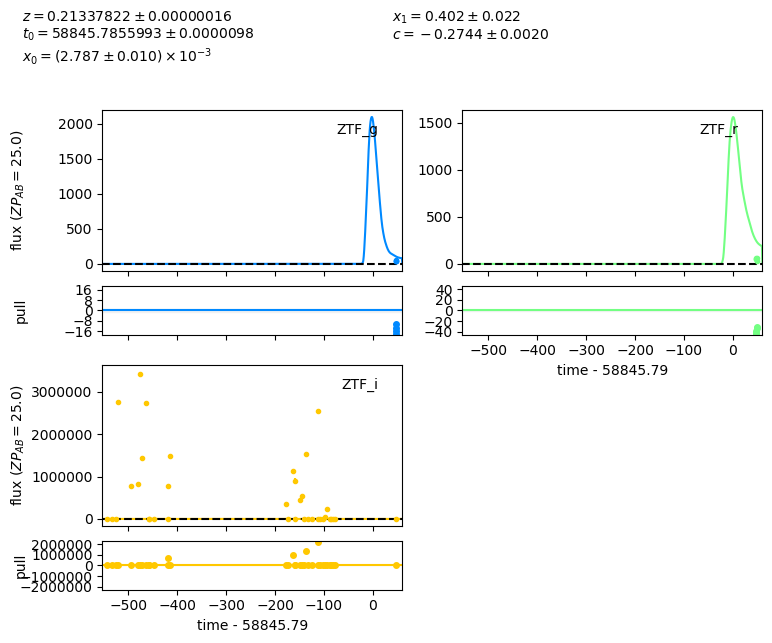

In [53]:
sncosmo.plot_lc(dt_sn, model=fitted_model, errors=res.errors)